In [1]:
import pandas as pd

In [2]:
reviews = pd.read_csv('data/Reviews.csv')

In [3]:
reviews = reviews.sample(n=50000)

In [4]:
reviews = reviews[['Score','Text']]

In [5]:
reviews.head()

,Score,Text
177566,5,"These are honestly the strangest cookies, but ..."
506865,5,This tea is one of my favorites. It's a caffe...
84555,5,"LOVE IT, LOVE IT LOVE IT!!! I'm so happy with ..."
446983,5,I bought a cookbook that uses Mirin in some re...
267995,4,this stuff is nasty if you don't add a flavore...


In [6]:
reviews = reviews[reviews.Score != 3]

In [7]:
reviews.Text = reviews.Text.map(lambda x : x.lower())

In [8]:
reviews.head()

,Score,Text
177566,5,"these are honestly the strangest cookies, but ..."
506865,5,this tea is one of my favorites. it's a caffe...
84555,5,"love it, love it love it!!! i'm so happy with ..."
446983,5,i bought a cookbook that uses mirin in some re...
267995,4,this stuff is nasty if you don't add a flavore...


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

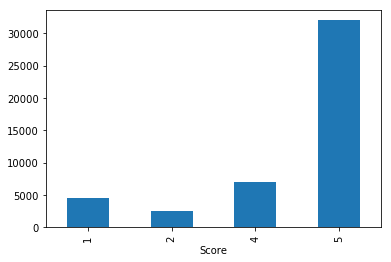

In [10]:
reviews.groupby('Score').size().plot.bar()

In [11]:
max_features = 2000

In [12]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [13]:
tokenizer = Tokenizer(num_words=max_features, split=' ')

In [14]:
tokenizer.fit_on_texts(reviews.Text.values)

In [15]:
X = tokenizer.texts_to_sequences(reviews.Text.values)

In [18]:
from keras.preprocessing.sequence import pad_sequences

In [19]:
X = pad_sequences(X)

In [20]:
X.shape

(46287, 1537)

In [21]:
X[0]

array([  0,   0,   0, ..., 440,   1, 129])

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [57]:
model = Sequential()

In [58]:
model.add(Embedding(max_features, 128, input_length=X.shape[1]))

In [59]:
model.add(Dropout(0.20))

In [60]:
import keras

In [61]:
model.add(keras.layers.recurrent.SimpleRNN(units = 100, activation='relu',use_bias=True))
model.add(keras.layers.Dense(units=1000, input_dim = 2000, activation='relu'))
model.add(keras.layers.Dense(units=500, input_dim=1000, activation='relu'))

In [62]:
model.add(keras.layers.Dense(units=4, input_dim=500,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1537, 128)         256000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1537, 128)         0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 100)               22900     
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              101000    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 2004      
Total params: 882,404
Trainable params: 882,404
Non-trainable params: 0
_________________________________________________________________


In [64]:
Y = pd.get_dummies(reviews.Score).values

In [65]:
Y

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ..., 
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [66]:
trainX, testX, trainY, testY = train_test_split(X,Y)

In [67]:
trainX.shape

(34715, 1537)

In [71]:
batch_size = 256

In [72]:
n_epoch = 5

In [ ]:
model.fit(trainX,trainY, nb_epoch=n_epoch, batch_size=batch_size)

C:\Users\ZekeLabs\Anaconda3-N\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/5
34715/34715 [==============================] - 6440s 186ms/step - loss: 0.7430 - acc: 0.7218
Epoch 2/5
24320/34715 [====================>.........] - ETA: 8:21 - loss: 0.6702 - acc: 0.7452

In [45]:
pd.get_dummies(reviews.Score).values

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ..., 
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)